In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_2\\Ej_5.txt',
    delimiter = '\t',
    decimal = ','
    )

In [64]:
datos.head()

,Fecha,Lamina0-10(mm),Lamina10-20(mm),Lamina20-30(mm),Lamina30-40(mm),Lamina40-60(mm),Lamina60-80(mm),Lamina80-100(mm),PP(mm),Kc,ET0(mm),Unnamed: 11,CAS,ETM,Ri
0,1999-11-11,25.519590,36.917621,35.738100,36.053417,75.914000,61.853182,52.160093,NaN,0.063568,3.359196,NaN,324.156003,0.213538,2.011104
1,1999-11-22,28.119353,36.264403,34.834845,35.612525,75.616652,63.631238,51.874552,15.2,0.182730,4.786528,NaN,325.953569,0.874644,-21.195027
2,1999-12-06,28.294544,35.086448,33.954238,35.017829,74.816099,60.772122,51.142619,27.5,0.579801,4.185483,NaN,319.083898,2.426748,-27.906055
3,1999-12-09,25.780627,33.799726,32.901478,34.836166,75.476392,61.864487,51.592220,2.0,0.707039,3.723710,NaN,316.251096,2.632809,-14.546170
4,1999-12-14,20.298116,29.538808,29.377584,32.786319,74.324793,63.407630,51.338868,2.5,0.935889,4.410054,NaN,301.072117,4.127321,12.354296


In [137]:
columnas = list(datos.columns)
del columnas[8:15]
iterador = list(range(1, len(columnas)))

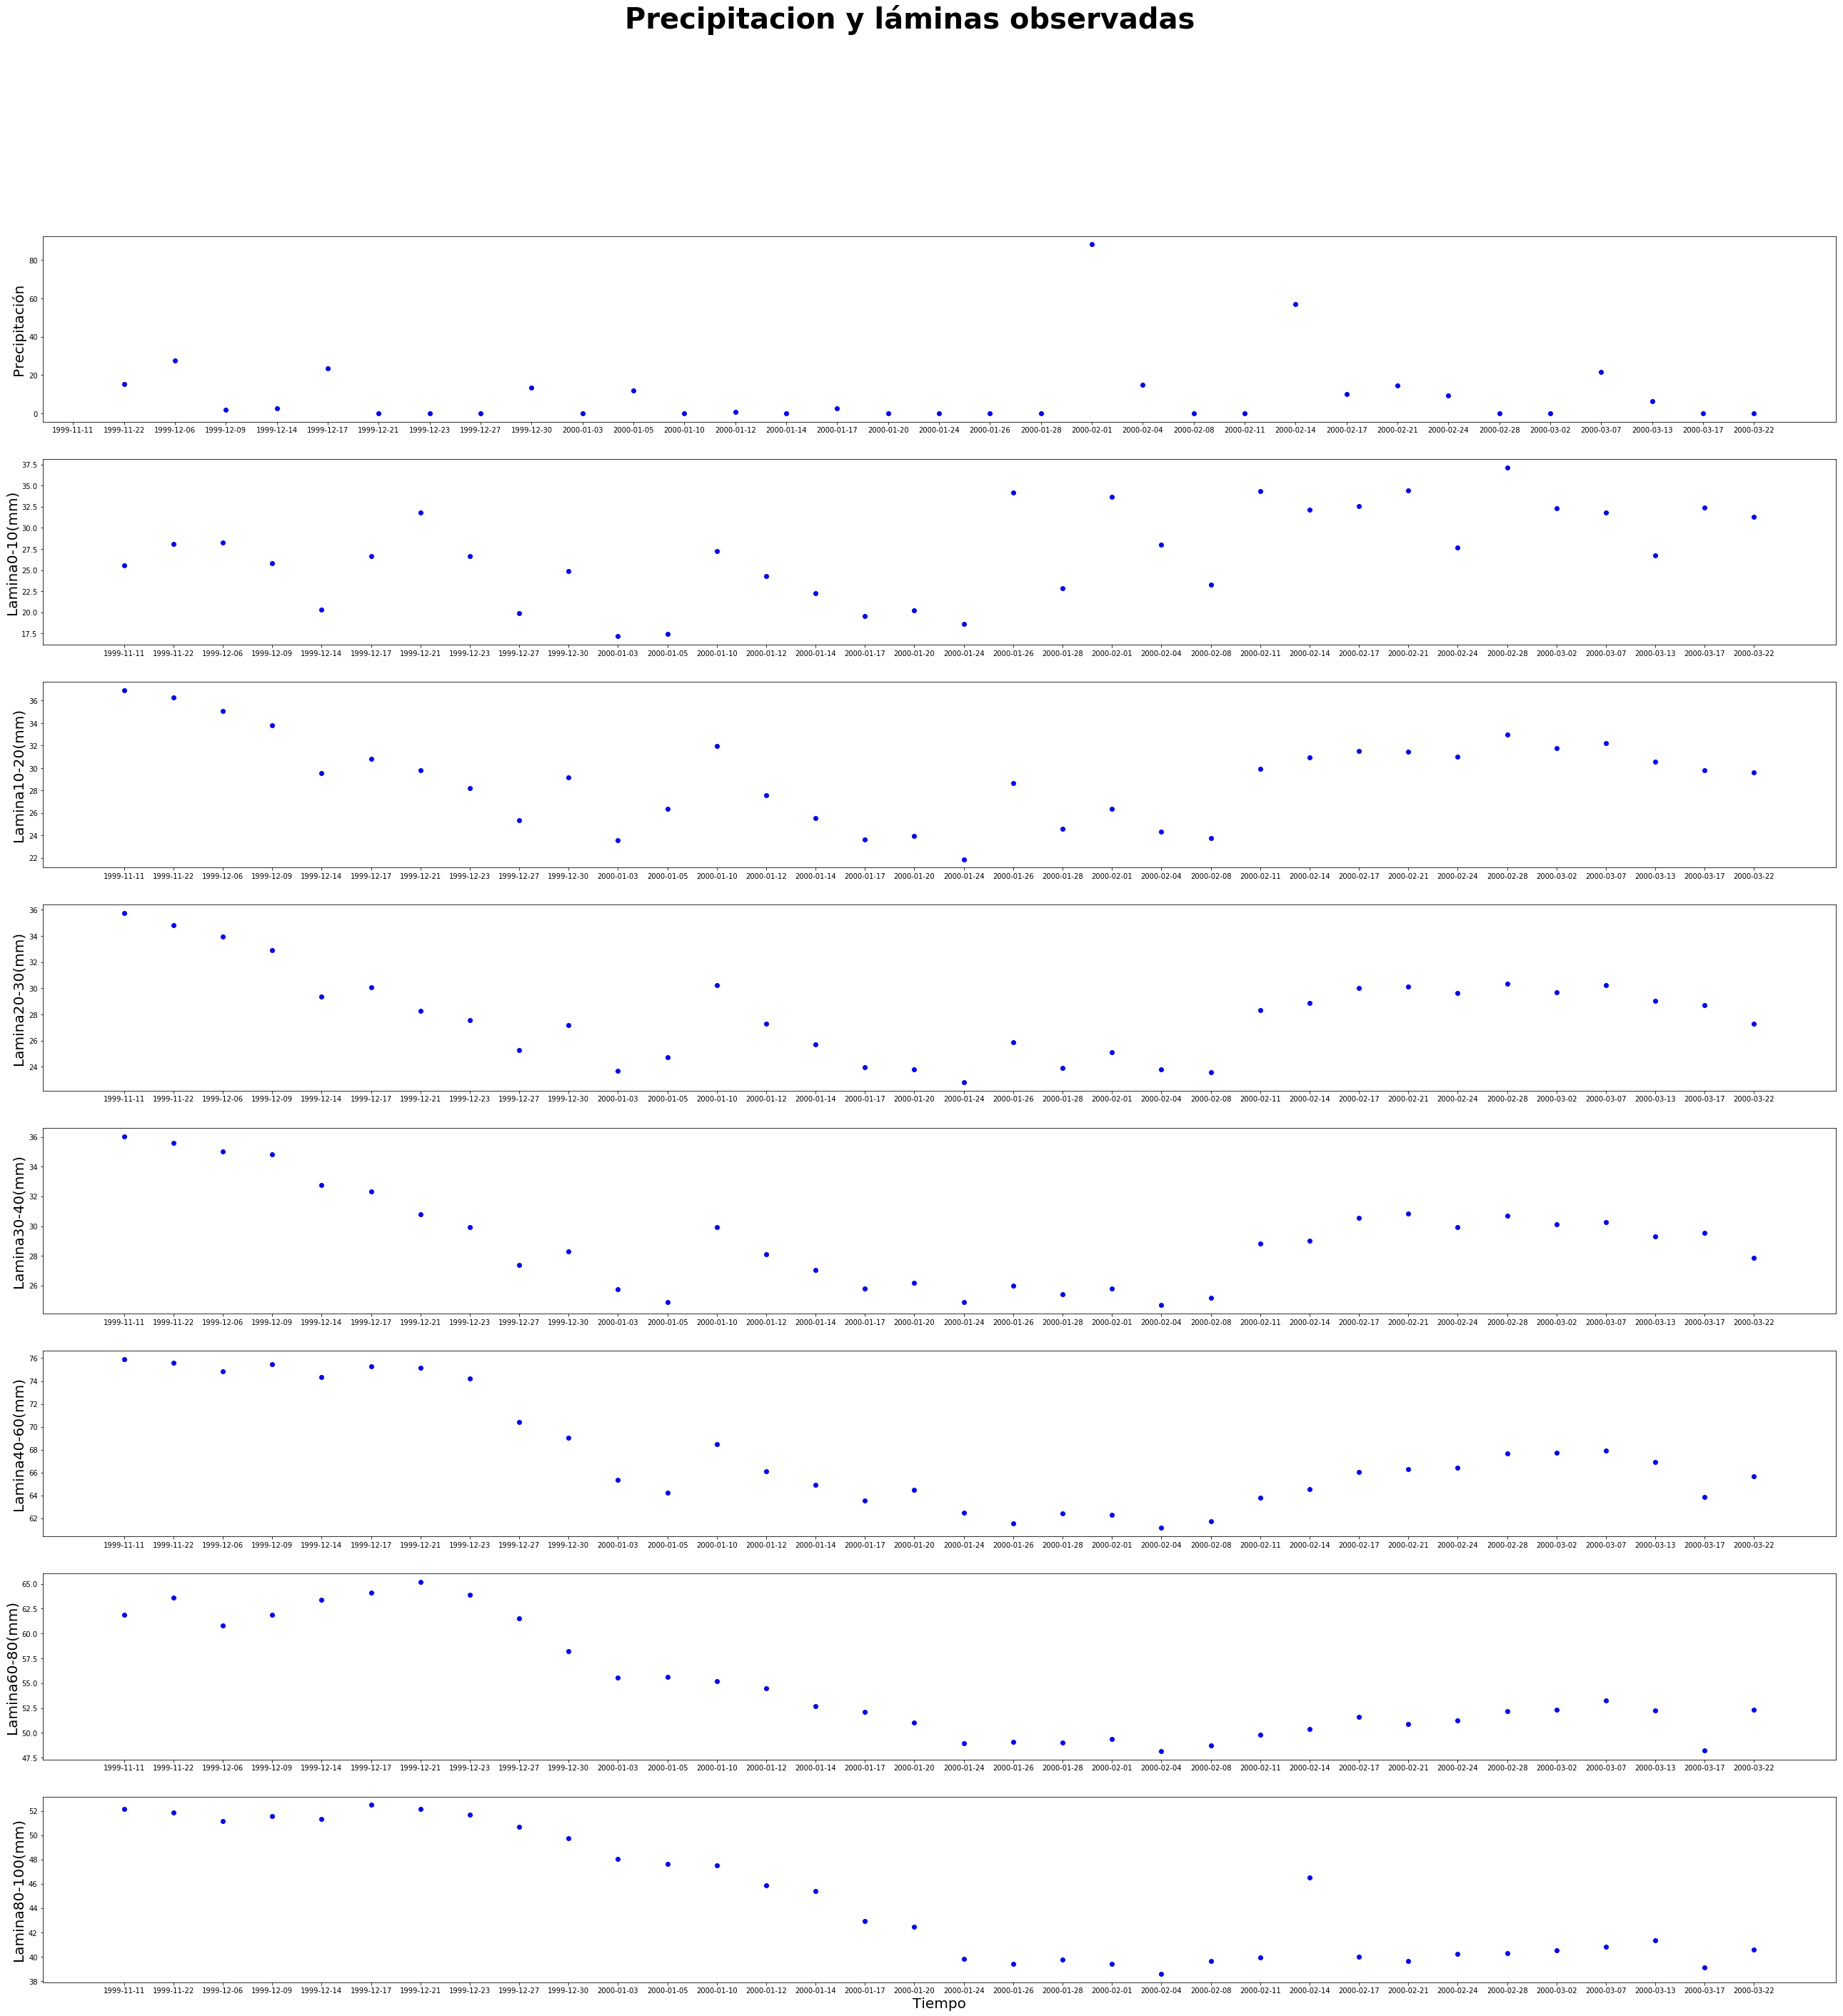

In [16]:
grafico, sub_graficos = plt.subplots(
    nrows = 8,
    figsize = (45, 45)
    )
grafico.suptitle(
    'Precipitacion y láminas observadas',
    fontsize = 40,
    fontweight='bold'
    )
plt.xlabel(
    'Tiempo',
    fontsize = 20
    )
sub_graficos[0].plot(
    datos['Fecha'],
    datos['PP(mm)'],
    'bo'
    )
sub_graficos[0].set_ylabel(
    'Precipitación',
    fontsize = 20
    )
for i in iterador:
    columna = columnas[i]
    sub_graficos[i].plot(
        datos['Fecha'],
        datos[columna],
        'bo'
        )
    sub_graficos[i].set_ylabel(
        columna,
        fontsize = 20
        )

In [10]:
grafico.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_2\\laminas.png')

<BarContainer object of 34 artists>

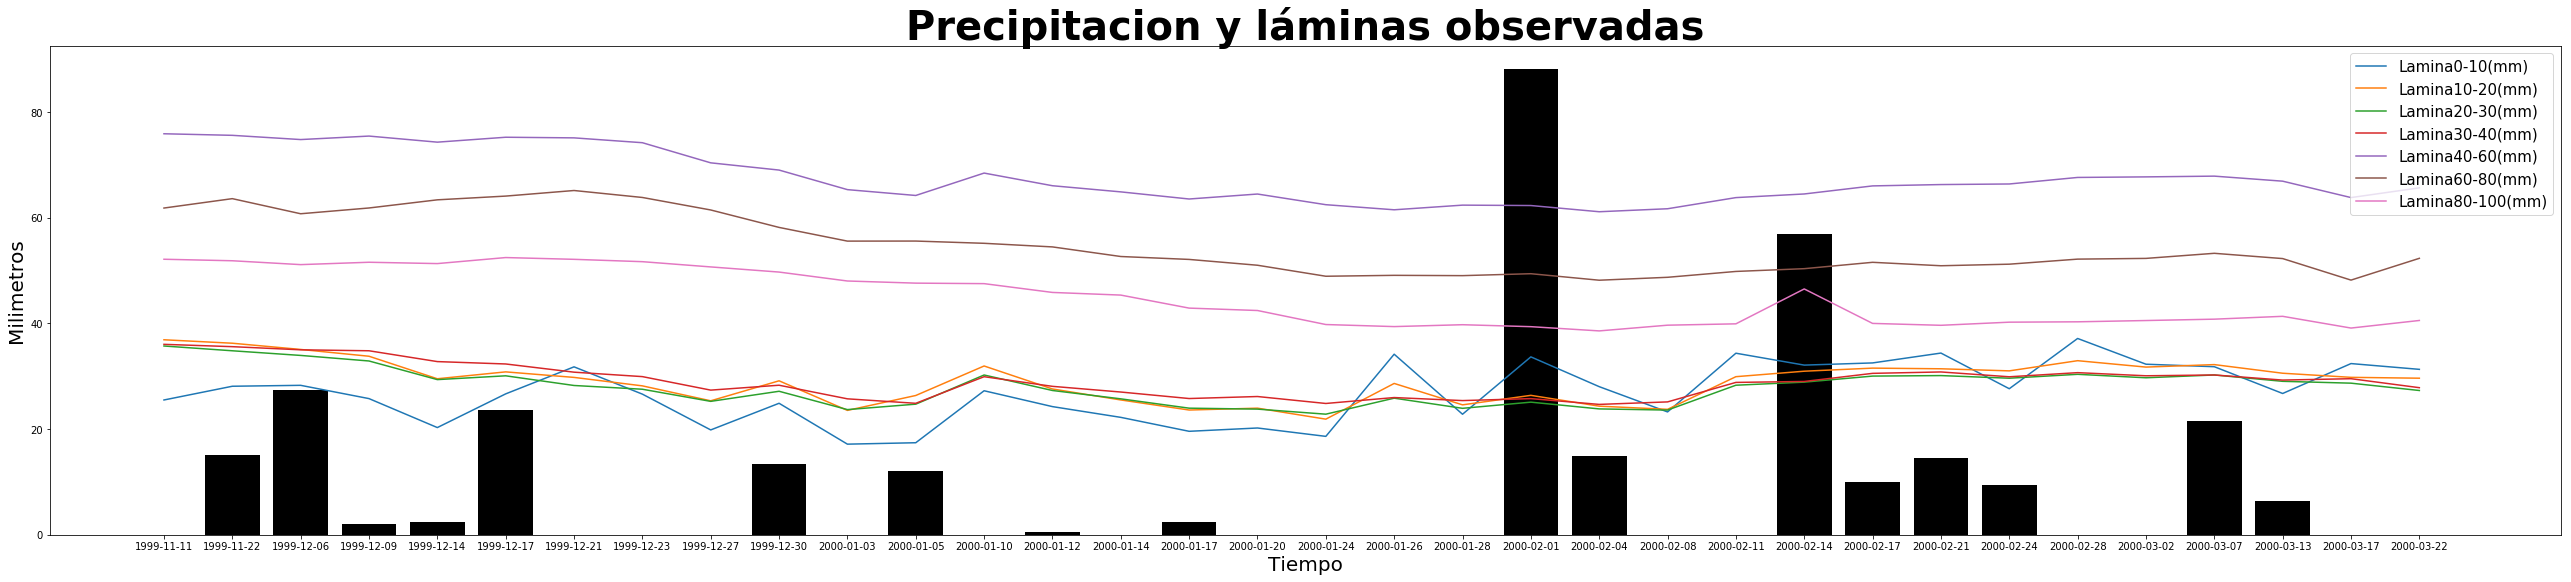

In [142]:
grafico_junto = plt.figure(figsize = (45, 9))
plt.title(
    'Precipitacion y láminas observadas',
    fontsize = 40,
    fontweight='bold'
    )
plt.xlabel(
    'Tiempo',
    fontsize = 20
    )
plt.ylabel(
    'Milimetros',
    fontsize = 20
    )
for i in iterador:
    columna = columnas[i]
    plt.plot(
    datos['Fecha'],
    datos[columna],
    '-'
    )
plt.legend(columnas[1:], fontsize = 15, loc = 'upper right')
plt.bar(
    datos['Fecha'],
    datos['PP(mm)'],
    color = 'black'
    )

In [143]:
grafico_junto.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_2\\todas_juntas.png')

In [86]:
capacidad_campo = [36, 36, 37.8, 37.8, 68.4, 72, 72]
datos['Consumo ' + columnas[1]] = datos['PP(mm)'][:]
iterador = list(range(1, len(datos['PP(mm)'] - 1)))
percolacion = iterador[:]
percolacion.append(0)
for i in iterador:
    exceso = datos['Lamina0-10(mm)'][i-1] + datos['PP(mm)'][i]
    if exceso > capacidad_campo[0]:
        percolacion[i] = exceso - capacidad_campo[0]
    else: percolacion[i] = 0
    datos['Consumo ' + columnas[1]][i] = (
        datos['Lamina0-10(mm)'][i-1]
        - datos['Lamina0-10(mm)'][i]
        + datos['PP(mm)'][i]
        - percolacion[i]
        )

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
columnas = columnas[1:]
percolacion_abajo = percolacion[:]
for j in iterador[0:6]:
    datos['Consumo ' + columnas[j]] = datos['PP(mm)'][:]
    for i in iterador:
        exceso = datos[columnas[j]][i-1] + percolacion[i]
        if exceso > capacidad_campo[j]:
            percolacion_abajo[i] = exceso - capacidad_campo[j]
        else: percolacion_abajo[i] = 0
        datos['Consumo ' + columnas[j]][i] = (
            datos[columnas[j]][i-1]
            - datos[columnas[j]][i]
            + percolacion[i]
            - percolacion_abajo[i]
            )
        percolacion[i] = percolacion_abajo[i]

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
datos.head()

,Fecha,Lamina0-10(mm),Lamina10-20(mm),Lamina20-30(mm),Lamina30-40(mm),Lamina40-60(mm),Lamina60-80(mm),Lamina80-100(mm),PP(mm),Kc,...,CAS,ETM,Ri,Consumo Lamina0-10(mm),Consumo Lamina10-20(mm),Consumo Lamina20-30(mm),Consumo Lamina30-40(mm),Consumo Lamina40-60(mm),Consumo Lamina60-80(mm),Consumo Lamina80-100(mm)
0,1999-11-11,25.519590,36.917621,35.738100,36.053417,75.914000,61.853182,52.160093,NaN,0.063568,...,324.156003,0.213538,2.011104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-11-22,28.119353,36.264403,34.834845,35.612525,75.616652,63.631238,51.874552,15.2,0.182730,...,325.953569,0.874644,-21.195027,7.880647,-0.264403,2.965155,2.187475,-7.216652,7.564673,0.285541
2,1999-12-06,28.294544,35.086448,33.954238,35.017829,74.816099,60.772122,51.142619,27.5,0.579801,...,319.083898,2.426748,-27.906055,7.705456,0.913552,3.845762,2.782171,-6.416099,11.227878,14.310950
3,1999-12-09,25.780627,33.799726,32.901478,34.836166,75.476392,61.864487,51.592220,2.0,0.707039,...,316.251096,2.632809,-14.546170,4.513917,1.286721,1.052759,0.181663,-7.076392,5.323734,-0.449601
4,1999-12-14,20.298116,29.538808,29.377584,32.786319,74.324793,63.407630,51.338868,2.5,0.935889,...,301.072117,4.127321,12.354296,7.982511,4.260918,3.523894,2.049847,-5.924793,5.533249,0.253352


In [89]:
datos['ET_total'] = datos['PP(mm)'][:]
for i in list(range(len(columnas))):
    datos['ET_total'] = datos['ET_total'].add(datos['Consumo ' + columnas[i]])

In [90]:
datos.head(30)

,Fecha,Lamina0-10(mm),Lamina10-20(mm),Lamina20-30(mm),Lamina30-40(mm),Lamina40-60(mm),Lamina60-80(mm),Lamina80-100(mm),PP(mm),Kc,...,ETM,Ri,Consumo Lamina0-10(mm),Consumo Lamina10-20(mm),Consumo Lamina20-30(mm),Consumo Lamina30-40(mm),Consumo Lamina40-60(mm),Consumo Lamina60-80(mm),Consumo Lamina80-100(mm),ET_total
0,1999-11-11,25.519590,36.917621,35.738100,36.053417,75.914000,61.853182,52.160093,NaN,0.063568,...,0.213538,2.011104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-11-22,28.119353,36.264403,34.834845,35.612525,75.616652,63.631238,51.874552,15.2,0.182730,...,0.874644,-21.195027,7.880647,-0.264403,2.965155,2.187475,-7.216652,7.564673,0.285541,28.602434
2,1999-12-06,28.294544,35.086448,33.954238,35.017829,74.816099,60.772122,51.142619,27.5,0.579801,...,2.426748,-27.906055,7.705456,0.913552,3.845762,2.782171,-6.416099,11.227878,14.310950,61.869671
3,1999-12-09,25.780627,33.799726,32.901478,34.836166,75.476392,61.864487,51.592220,2.0,0.707039,...,2.632809,-14.546170,4.513917,1.286721,1.052759,0.181663,-7.076392,5.323734,-0.449601,6.832802
4,1999-12-14,20.298116,29.538808,29.377584,32.786319,74.324793,63.407630,51.338868,2.5,0.935889,...,4.127321,12.354296,7.982511,4.260918,3.523894,2.049847,-5.924793,5.533249,0.253352,20.178978
5,1999-12-17,26.677068,30.840976,30.095065,32.336355,75.255177,64.115290,52.479161,23.6,1.073316,...,6.348619,-15.959336,9.322932,5.159024,0.719444,0.449964,-6.855177,5.217132,-1.140293,36.473026
6,1999-12-21,31.793755,29.794781,28.263629,30.784141,75.136646,65.172378,52.145807,0.0,1.244041,...,3.992901,-7.004308,-5.116688,1.046195,1.831436,1.552214,-6.736646,5.798089,0.333355,-1.292045
7,1999-12-23,26.628156,28.192630,27.554815,29.943723,74.220891,63.853496,51.700218,0.0,1.320904,...,5.230562,-16.396474,5.165600,1.602151,0.708814,0.840418,-5.820891,8.055528,0.445588,10.997208
8,1999-12-27,19.851397,25.363424,25.259834,27.387395,70.409365,61.487497,50.707981,0.0,1.453722,...,8.710574,14.735868,6.776759,2.829206,2.294981,2.556328,-2.009365,8.186889,0.992238,21.627036
9,1999-12-30,24.896281,29.150195,27.168950,28.314178,69.042631,58.185867,49.734083,13.4,1.534332,...,8.447495,-32.324274,8.355116,-3.786771,-1.909116,-0.926784,-0.642631,5.310995,0.973898,20.774707


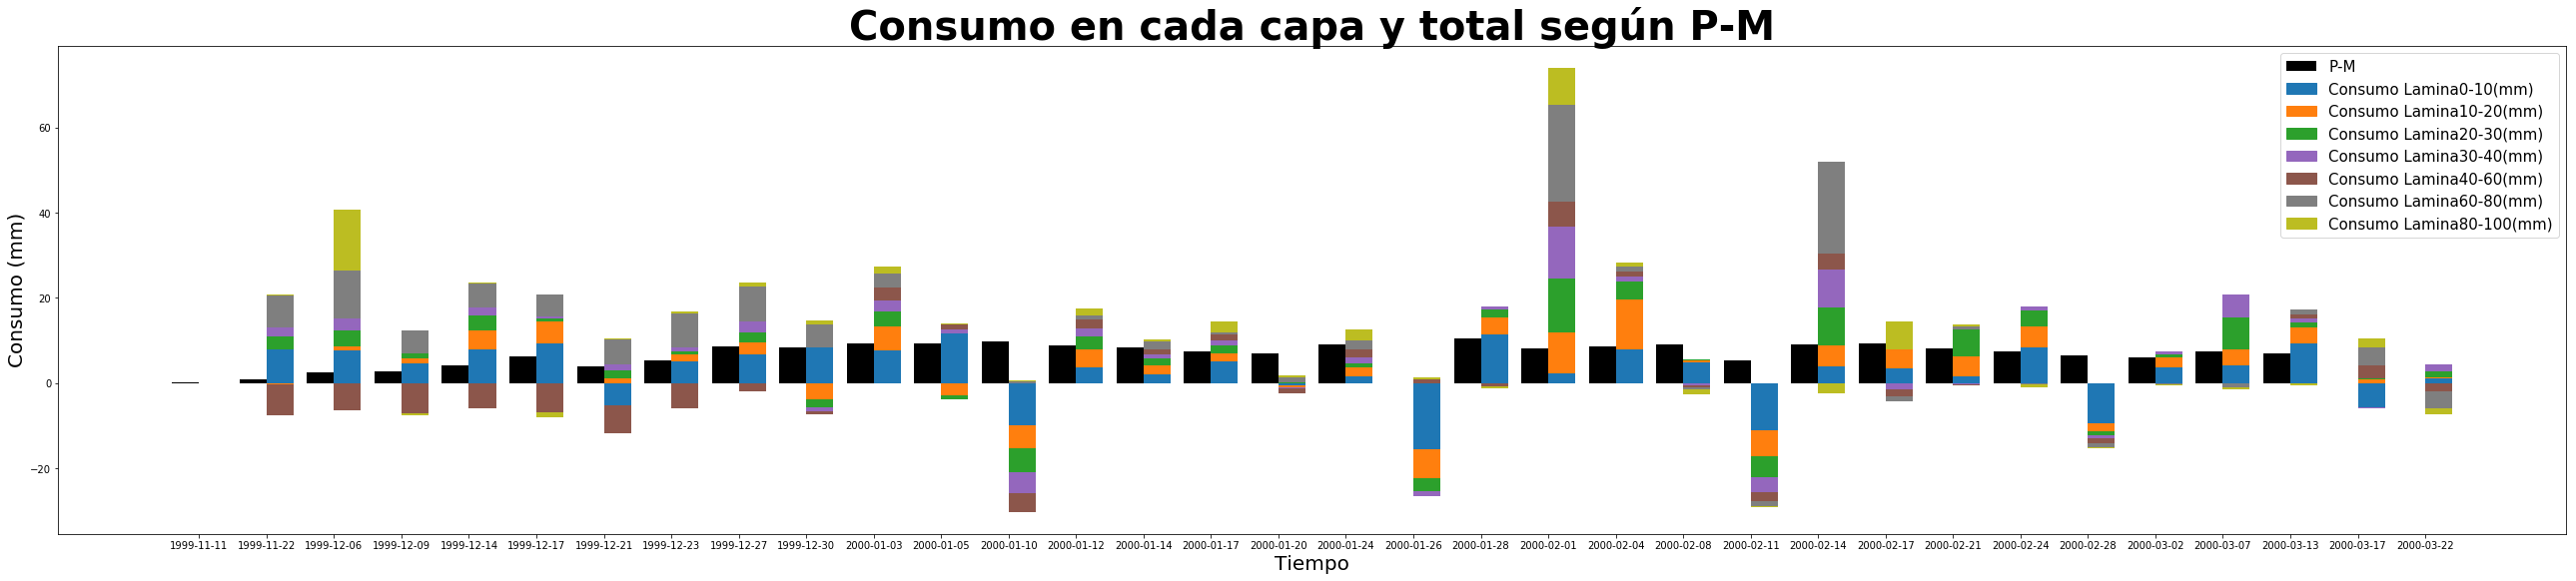

In [134]:
grafico_final, ax1 = plt.subplots(figsize = (45, 9))
plt.title(
    'Consumo en cada capa y total según P-M',
    fontsize = 40,
    fontweight='bold'
    )
plt.xlabel(
    'Tiempo',
    fontsize = 20
    )
plt.ylabel(
    'Consumo (mm)',
    fontsize = 20
    )
ax1.set_xticks(datos.index)
ax1.set_xticklabels(datos['Fecha'])
plt.bar(
    datos.index - 0.2,
    datos['ETM'],
    color = 'black',
    width = 0.4
    )
columnas = list(datos.columns)
del columnas[:-8]
columnas.remove('ET_total')
iterador = list(range(len(columnas)))
contador = list(range(len(datos[columnas[0]])))
eje_neg = np.zeros(len(datos[columnas[0]]))
eje_pos = np.zeros(len(datos[columnas[0]]))
colores = ['tab:blue', 'tab:orange', 'tab:green',
           'tab:purple', 'tab:brown', 'tab:gray',
           'tab:olive'
          ]
for i in iterador:
    columna = columnas[i]
    color = colores[i]
    for j in contador:
        if datos[columna][j] < 0:
            plt.bar(
                datos.index[j] + 0.2,
                datos[columna][j],
                width = 0.4,
                color = color,
                bottom = eje_neg[j]
                )
            eje_neg[j] = eje_neg[j] + datos[columna][j]
        else: 
            plt.bar(
                datos.index[j] + 0.2,
                datos[columna][j],
                width = 0.4,
                color = color,
                bottom = eje_pos[j]
                )
            eje_pos[j] = eje_pos[j] + datos[columna][j]
columnas.insert(0, 'P-M')
leg = plt.legend(columnas[:], fontsize = 15)
iterador_2 = list(range(1, len(colores) + 1))
for i in iterador_2:
    leg.legendHandles[i].set_color(colores[i-1])

In [135]:
grafico_final.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_2\\final.png')

In [125]:
iterador

[0, 1, 2, 3, 4, 5, 6]

In [103]:
eje_neg

array([  0.        ,  -7.48105524,  -6.41609945,  -7.52599318,
        -5.92479277,  -7.99547084, -11.85333373,  -5.82089076,
        -2.00936466,  -7.26530126,   0.        ,  -3.85873787,
       -30.22239388,   0.        ,   0.        ,   0.        ,
        -2.30081651,   0.        , -26.634244  ,  -1.23630116,
         0.        ,   0.        ,  -2.67430629, -29.16404061,
        -2.45730315,  -4.32061391,  -0.51876508,  -0.9970996 ,
       -15.22391975,  -0.48435586,  -1.36431817,  -0.53898164,
        -5.92197582,  -7.40241415])

In [104]:
datos[columna][j]

-1.435709579999994

In [105]:
datos.tail()

,Fecha,Lamina0-10(mm),Lamina10-20(mm),Lamina20-30(mm),Lamina30-40(mm),Lamina40-60(mm),Lamina60-80(mm),Lamina80-100(mm),PP(mm),Kc,...,ETM,Ri,Consumo Lamina0-10(mm),Consumo Lamina10-20(mm),Consumo Lamina20-30(mm),Consumo Lamina30-40(mm),Consumo Lamina40-60(mm),Consumo Lamina60-80(mm),Consumo Lamina80-100(mm),ET_total
29,2000-03-02,32.291879,31.747000,29.724045,30.100409,67.751614,52.320705,40.559341,0.0,1.813528,...,6.118253,8.160813,3.708121,2.376076,0.653660,0.592613,-0.105935,-0.137255,-0.241166,6.846115
30,2000-03-07,31.817506,32.217455,30.253307,30.253307,67.892750,53.285136,40.818091,21.5,1.813737,...,7.410476,-24.368770,4.182494,3.782545,7.546693,5.310026,-0.141136,-0.964432,-0.258750,40.957440
31,2000-03-13,26.750000,30.583913,29.052761,29.288323,66.939092,52.287144,41.357073,6.4,1.813881,...,7.041673,-3.965433,9.250000,3.851048,1.200546,0.964984,0.953658,0.997993,-0.538982,23.079246
32,2000-03-17,32.412307,29.806009,28.703572,29.547991,63.834113,48.212357,39.134850,0.0,1.813938,...,0.000000,3.054980,-5.662307,0.777905,0.349189,-0.259669,3.104979,4.074787,2.222223,4.607106
33,2000-03-22,31.318299,29.642259,27.314594,27.847294,65.676909,52.336266,40.570559,0.0,1.813983,...,0.000000,-274.706180,1.094009,0.163750,1.388978,1.700698,-1.842796,-4.123909,-1.435710,-3.054980
